# Le problème du vendeur de journaux (à une période de temps)

Chaque matin, le vendeur doit décider d’un nombre de journaux à commander $u ∈ 𝕌 = {0, 1,\ldots}$ au prix unitaire $c > 0$. La demande du jour est incertaine $w ∈ 𝕎 = {0, 1,\ldots}$.

Si à la ﬁn de la journée il lui reste des invendus (coût unitaire $c_S ∈ ℝ$):
$$c_S(u − w )_+ = c_S \max (u − w,0)$$
On suppose que $c > − c_S$.

Si à la ﬁn de la journée il n’a pas pu faire face à la demande on associe un coût unitaire $c_M$. Le coût lié à la non satisfaction de la demande est:
$$c_M (w − u )_+ = c_M \max (w − u,0).$$

In [249]:
import numpy as np;
from scipy.special import comb;
from scipy.special import gamma;
import matplotlib.pyplot as plt
import io;

In [252]:
binomiale=1
discrete=2
poisson=3

def choisir_loi(law):

    if law == binomiale:  ## loi binomiale
        n=100
        p=0.5

        buf = io.StringIO()
        buf.write("loi binomiale(%d,%5.2f)" % (n,p))
        title = buf.getvalue()
    
        wi = np.linspace(0,n,num=n+1) ## les valeurs possibles {0,1,...,n}
        ## pdf("bin",x,n,p) = n!/x!(n-x)! p^x (1-p)^n-x 
        nn = n*np.ones(n+1)
        pi=comb(nn,wi, exact=False) * pow(p,wi)*pow(1-p,n-wi)

        mu=n*p; ## moyenne de la binomiale 
        mu1= sum(pi*wi) ; ## vérification 
        if abs(mu-mu1) > 1.e-8:
            print("something wrong in binomial law expectation")
            wait = input("PRESS ENTER TO CONTINUE.")
    
        # un echantillong de taille N
        N=1000
        #W=grand(1,N,"bin",n,p);
        W = np.random.binomial(n, p, N)
 
    if law == discrete: ## une loi discrète 
        n=3
        wi=np.array([30,50,80])
        #DEBUTQUESTION
        # A vous
        # pi = choisir des probabilités
        #ENDQUESTION
        #DEBUTREPONSE
        pi=np.array([1/2,1/4,1/4])
        #ENDREPONSE
        buf = io.StringIO()
        buf.write("loi discrète sur %d valeurs" % wi.size)
        title = buf.getvalue()
        #DEBUTQUESTION
        # A vous : mu= ## la moyenne
        #ENDQUESTION
        #DEBUTREPONSE
        mu=sum(pi*wi) ## la moyenne
        #ENDREPONSE

        N=1000
        # un echantillong de taille N
        #DEBUTQUESTION
        # A vous : tirer un échantillon de taille N
        #ENDQUESTION
        #DEBUTREPONSE
        W=np.random.choice(wi, N, p=pi) # un échantillon de taille N selon la loi pi
        #ENDREPONSE
    
    if law == poisson: ## loi de Poisson de paramètre mu 
        n=100;
        p=0.5;
        mu=n*p;
        wi=np.linspace(0,n,num=n+1); ## les valeurs possibles 
        pi=( pow(mu,wi) *np.exp(-mu)) / gamma(wi+1);
        buf = io.StringIO();
        buf.write("Poisson %f" % mu);
        title = buf.getvalue();
        #DEBUTQUESTION
        # A vous : 
        #     calculer la moyenne theorique, 
        #     tirer un echantillon de taille N, 
        #     comparer avec la moyenne empirique
        #ENDQUESTION
        #DEBUTREPONSE
        moy = sum(pi*wi);
        N=100000;
        W= np.random.poisson(mu, N);
        moye=sum(W)/N # doit converger vers moy lorsque N grand
        #ENDREPONSE

    return pi, wi, W, title

def hist_plot(samples,support=[]):
    if np.size(support)==0:
        support = np.sort(list(dict.fromkeys(samples)))
    histo=np.zeros(support.size);
    for i in range(support.size):
        histo[i]=np.size(np.where(samples==support[i]))/(W.size)
    # On trace cet histogramme
    plt.bar(support, histo,width=1)


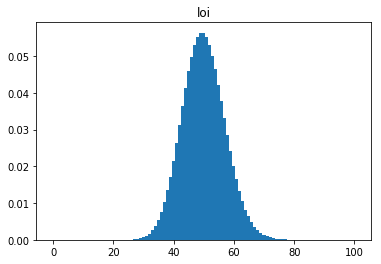

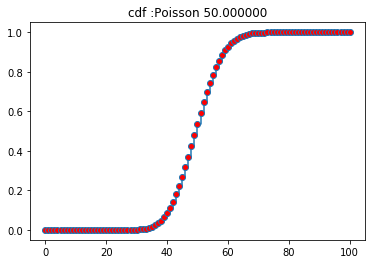

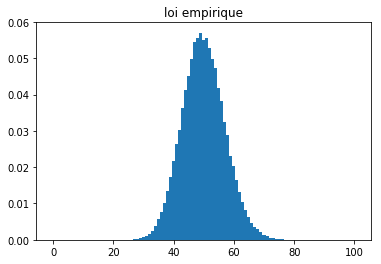

In [257]:
pi, wi, W, title = choisir_loi(poisson) # poisson, binomiale, discrete

fig = plt.gcf()

#plt.subplot(1,3,1);
plt.bar(wi,pi,width=1)
plt.title("loi"); 
plt.show()

#plt.subplot(1,3,2);
plt.step(wi,np.cumsum(pi),where='post',marker='o',markerfacecolor='r');
plt.title("cdf :" + title)
plt.show()

#plt.subplot(1,3,3);
hist_plot(W,wi)
plt.title("loi empirique"); 
plt.show()

__Paragraph 1.2__ On utilise tout d’abord la distribution de Poisson

__1.1 La demande aléatoire__

On veut faire tourner le même code pour plusieurs lois distinctes qui seront des lois discrètes. La valeur de law permet de selctionner une loi au choix: loi _binomiale_, loi _discrete_, loi de _Poisson_.


In [225]:
pi, wi, W, title = choisir_loi(poisson)

__Question 2.__ Écrire une fonction Python qui calcule j(u,w) puis une fonction qui calcule J(u). Faire un graphique avec les valeurs proposées des constantes et calculer le nombre de journaux qu’il faut commander 

Cas discrêt: Nombre optimal de journaux a commander *30.000000*, Moyenne de la demande *47.500000*



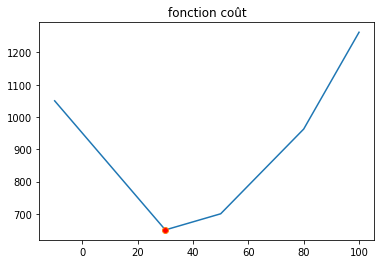

Cas binomial: Nombre optimal de journaux a commander *49.000000*, Moyenne de la demande *50.000000*



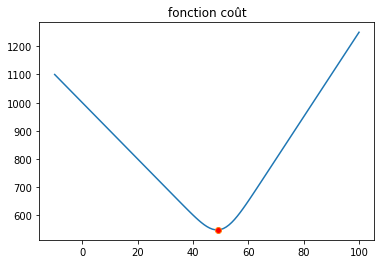

Cas Poisson: Nombre optimal de journaux a commander *48.000000*, Moyenne de la demande *50.000000*



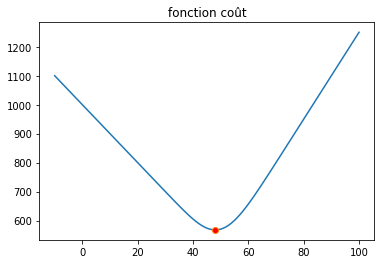

In [238]:
c=10;cm=20;cs=5;cf=200;

# la fonction coût j(u,w)
def jj(u,w):
    #DEBUTQUESTION
    # A vous : écrire la fonction j (voir slides)
    #ENDQUESTION
    #DEBUTREPONSE
    return c*u + cs*np.maximum(u - w,0) + cm*np.maximum(w - u,0);
    #ENDREPONSE


def J(u,pi,wi):
    #DEBUTQUESTION
    # A vous : écrire la fonction J = la moyenne de j (voir slides)
    #ENDQUESTION
    #DEBUTREPONSE
    #return np.sum(pi*j(u,wi))
    return c*u + cs*sum(pi*np.maximum(u - wi,0)) + cm*sum(pi*np.maximum(wi - u,0));
    #ENDREPONSE


def resultats(pi,wi,dessin='oui'):
# draw the function and the minimum 

    # remplir val avec les valeurs de J(u) quand u varie de -10 a 100 avec un pas de 1
    u=np.linspace(-10,100,num=111)
    val=np.zeros(u.size);
    for i in range(0,u.size):
        #DEBUTQUESTION
        # A vous : val[i]= ??
        # val[i]=  # modifier
        #ENDQUESTION
        #DEBUTREPONSE
        val[i]=J(u[i],pi,wi)
        #ENDREPONSE
    
    # recherche du min 
    #DEBUTQUESTION
    # A vous : trouver la valeur uopt
    # uopt = ?
    #ENDQUESTION
    #DEBUTREPONSE
    imin=np.argmin(val)
    uopt = u[imin]
    #ENDREPONSE
    
    if dessin=='oui':
        plt.plot(u,val);
        plt.title("fonction coût");
        plt.plot(uopt,val[imin],marker='o',markerfacecolor='r')

        print("Nombre optimal de journaux a commander *%f*, " % uopt,end='');
        print("Moyenne de la demande *%f*\n" % sum(wi*pi));

    return uopt


pi, wi, W, title = choisir_loi(discrete) # poisson, binomiale, discrete
print('Cas discrêt: ',end='')
resultats(pi,wi)
plt.show()
    
pi, wi, W, title = choisir_loi(binomiale) # poisson, binomiale, discrete
print('Cas binomial: ',end='')
resultats(pi,wi)
plt.show()

pi, wi, W, title = choisir_loi(poisson) # poisson, binomiale, discrete
print('Cas Poisson: ',end='')
resultats(pi,wi)
plt.show()



__Question 3.__ Vériﬁer sur un graphique que le nombre de journaux optimal à commander s’obtient par la formule :

$$\text{uopt} = \inf\left\{z ∈ ℝ |F (z) ≥ (c_M − c)∕ (c_M + c_S )\right\}$$


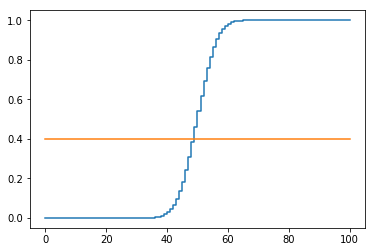

In [239]:
pi, wi, W, title = choisir_loi(binomiale) # poisson, binomiale, discrete

# On dessine F 
fstar = (cm-c)/(cm+cs) # valeur limite
Fv= np.cumsum(pi) # calcul de la fonction de repartition
plt.clf()
xx=np.hstack((0,wi)) # on rajoute 0 a wi
yy=np.hstack((0,Fv)) # on rajoute 0 a Fv
plt.step(xx,yy,where='post') # tracé de la fonction de répartition
plt.plot(xx,fstar*np.ones(xx.size)) # droite horizontale de valeur fstar


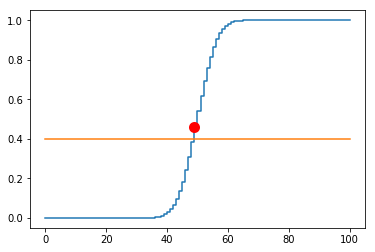

In [240]:
# chercher l'indice qui donne uopt avec la formule du cours
kopt=0
for i in range(0,Fv.size):
    if Fv[i] >= fstar:
        kopt=i
        break;

plt.step(xx,yy,where='post') # marker='o',markerfacecolor='r');
plt.plot(xx,fstar*np.ones(xx.size))
plt.plot(wi[kopt],Fv[kopt],marker='o',markeredgewidth=5,markeredgecolor='r',markerfacecolor='r');


_Paragraphe 1.3._ On utilise maintenant une loi discrète à 3 valeurs (law=2)

Dans le cas précédent, on trouve que le nombre de journaux optimal à commander est très voisin de la moyenne de la demande. On cherche ici à construire un exemple ou les deux nombres seront franchement diﬀérents.

__Question 4.__ Reprendre ce qui précède, en vous plaçant maintenant dans le cas 2 et chercher à caler des valeurs des probabilités qui permettent d’obtenir le résultat souhaité.

Nombre optimal de journaux a commander *10.000000*, Moyenne de la demande *23.750000*



10.0

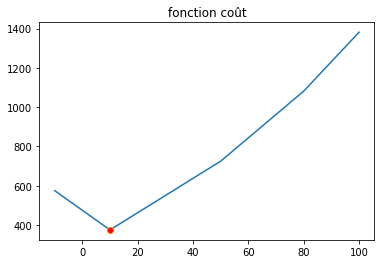

In [241]:
wi=np.array([10,50,80])
pi=np.array([3/4,1/8,1/8])

resultats(pi,wi)

_Paragraphe 1.4_ La loi du coût

__Question 5.__ Dans les cas 1 (binomiale) et cas 2 (discrete), faites un graphique de la loi du coût pour diverses valeurs de la commande $u$. On procédera de deux façons diﬀérentes
    - En calculant la loi du coût.
    - En approchant la loi du coût au moyen de tirages de la demande (loi empirique des coûts).

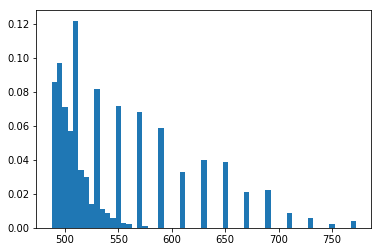

52


<BarContainer object of 51 artists>

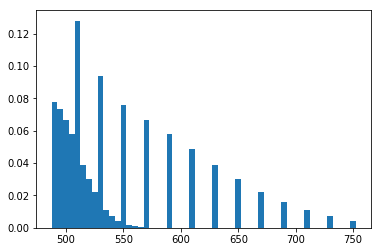

In [246]:
plt.clf()

def draw_cost(u,W):
    #count, bins, ignored =   plt.hist(j(u,W),density=True)
    samples=jj(u,W)
    max_samples=max(samples)
    hist_plot(samples)
    return max_samples

# poisson , discrete, binomiale
pi, wi, W, title = choisir_loi(binomiale)

u=49
# commence par traiter le problème par simulation (avec W)
max_samples=draw_cost(u,W);
plt.show()

# calcul de la loi exacte
valeurs=jj(u,wi) # toutes les valeurs de j(u,wi[i])
support = np.sort(list(dict.fromkeys(valeurs))) 
      # on calcule le support de la loi
      # en enlevant les valeurs en double
loi=np.zeros(support.size) # on va calculer la loi de j(u,W)
for i in range(support.size):
    for k in range(wi.size):
        if jj(u,wi[k]) == support[i]:
            loi[i]=loi[i]+pi[k]

# on tronque l'histogramme au delà de la valeur max_samples
for imax in range(support.size):
    if support[imax] > max_samples:
        print(imax);break
imax=imax-1
            
# On trace cet histogramme
plt.bar(support[0:imax], loi[0:imax],width=5)


__Paragraphe 1.6.__  Stratégie $[s,S]$

On regarde maintenant un cas ou le vendeur à déjà des journaux et où il paye un coup ﬁxe s'il commande des journaux. 
On cherche à retrouver ici le fait que la stratégie optimale est de la forme $[s,S]$.

__Question 7.__ On se placera dans le cas test=1. Calculer le nombre optimal de journaux à commander 
suivant la valeur du stock initial. 
Vériﬁer que la stratégie est bien de la forme $[s,S]$: 
on remonte le stock au niveau $S$ si il est inférieur à $s$ et on ne fait rien sinon. 

On vérifie que $s$ se calcule aussi par la formule
$$s := \sup \left\{z ∈ (− ∞, S)|J(z) ≥ cF + J(S )\right\} $$

1) Calcul par une méthode brutale : valeur de s=23.000000 et de S=48.000000



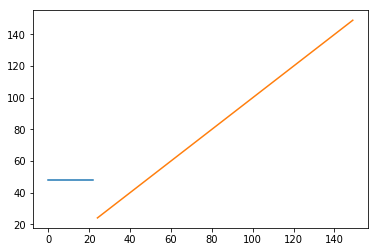

2) Formule du cours: valeur de s=23.000000 et de S=48.000000



In [259]:
# On regarde maintenant un cas ou le vendeur à déjà des journaux 
# et ou il paye un coup fixe s'il commande des journaux 
# on voit une stratégie [s,S] 

def Jtilde(u,x,pi,wi):
    return cf*(u>0) + J(u+x,pi,wi) -c*x

# Le but est de verifier que l'on a une stratégie [s,S]

# Coix du modèle : poisson , discrete, binomiale
pi, wi, W, title = choisir_loi(poisson)

# Calcul de S
# S=uopt, où uopt est l'argmin de J(u) (cf Slide 11/20)
# uopt est caclulé dans la fonction résultat
uopt=resultats(pi,wi,dessin='non') # on ne veux pas de dessin ici
S=uopt 

# Il nous faut maintenant calculer s
xv=np.linspace(0,2*max(wi), num=200+1);
xuopt=xv.copy();
U=np.linspace(0,2*max(wi), num=200+1); # 
Ju=U.copy();

for i in range(0, xv.size):
    for j in range(0, U.size):
        Ju[j]= Jtilde(U[j],xv[i],pi,wi); # à xv[i] stock fixé, on calcule les coûts pour les commandes U[j]  
    k = np.argmin(Ju); # on optimize en Ju
    xuopt[i]= U[k]; # ca qui nous donne la commande optimale pour le stock initial xv[i]

# s = la valeur la plus grande où le contrôle est non nul
# on cherche donc l'indice iopt de la valeur la plus petite où le 
# contrôle est non nul. xv[iopt-1] donne la valeur de s cherchée.
iopt=-1;
for i in range(0, xuopt.size):
    if xuopt[i] == 0:
        iopt=i;
        break;
# (iopt-1) est le dernier indice ou la controle est non nul
# et s est la valeur de x correspondante xv[iopt-1]
s = xv[iopt-1]
print("1) Calcul par une méthode brutale : valeur de s=%f et de S=%f\n" % (s, S))

plt.clf()

# on vérifie que pour x en dessous de s, x+uopt=cte=S
plt.plot(xv[:int(s)],xv[:int(s)]+xuopt[:int(s)])

# au dela xuopt=0 (on ne commande rien), donc on est sur la droite y = x!
plt.plot(xv[int(s)+1:150],xv[int(s)+1:150]+xuopt[int(s)+1:150])

plt.show()

# On vérifie le formule de s donnée dans le cours (p.11 cours-4) fonctionne
xv= np.linspace(0,2*max(wi), num=200+1);
Jv=np.zeros(xv.size);
for i in range(0,xv.size):
    Jv[i]=J(xv[i],pi,wi)
JS=J(S,pi,wi) # J(S)
costs = Jv - (cf + JS);
# calcul du plus grand z où J(z) >= c_F + J(S)
iopt=-1
for i in range(0,xv.size):
    if costs[i] <=0:
        iopt=i;
        break;
if iopt < 0: 
    s=0 
else:
    s=xv[iopt-1]
    
print("2) Formule du cours: valeur de s=%f et de S=%f\n" % (s, S))


 Question 6 En utilisant la présentation faite en cours, construire un problème linéaire dont la solution 
    permet de calculer le nombre de journaux optimal à commander 